In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

# Carga y lectura de datos Argo + Copernicus

In [2]:
datos_argo = 'Datos/2903822_prof.nc'
datos_copernicus = 'Datos/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m_1703674071184.nc'

dataset = nc.Dataset(datos_argo, 'r')

In [3]:
print("Dimensiones:")
for dim in dataset.dimensions.values():
    print(dim)

# Leer e imprimir las variables
print("\nVariables:")
for var in dataset.variables.values():
    print(var)

# Leer e imprimir los atributos globales
print("\nAtributos Globales:")
for attr in dataset.ncattrs():
    print(f"{attr}: {dataset.getncattr(attr)}")

Dimensiones:
<class 'netCDF4._netCDF4.Dimension'>: name = 'DATE_TIME', size = 14
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING256', size = 256
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING64', size = 64
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING32', size = 32
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING16', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING8', size = 8
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING4', size = 4
<class 'netCDF4._netCDF4.Dimension'>: name = 'STRING2', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'N_PROF', size = 27
<class 'netCDF4._netCDF4.Dimension'>: name = 'N_PARAM', size = 4
<class 'netCDF4._netCDF4.Dimension'>: name = 'N_LEVELS', size = 98
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'N_HISTORY', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'N_CALIB', size = 1

Variables:
<class 'netCDF4._netCDF4.Variable'>
|S1 DATA_TYPE(STRING16)
    long_name: Data type
    conventions:

In [5]:
with nc.Dataset(datos_argo, 'r') as dataset:
    # Imprimir los nombres de todas las variables
    print("Nombres de las variables:")
    for nombre_variable in dataset.variables:
        print(nombre_variable)

Nombres de las variables:
DATA_TYPE
FORMAT_VERSION
HANDBOOK_VERSION
REFERENCE_DATE_TIME
DATE_CREATION
DATE_UPDATE
PLATFORM_NUMBER
PROJECT_NAME
PI_NAME
STATION_PARAMETERS
CYCLE_NUMBER
DIRECTION
DATA_CENTRE
DC_REFERENCE
DATA_STATE_INDICATOR
DATA_MODE
PLATFORM_TYPE
FLOAT_SERIAL_NO
FIRMWARE_VERSION
WMO_INST_TYPE
JULD
JULD_QC
JULD_LOCATION
LATITUDE
LONGITUDE
POSITION_QC
POSITIONING_SYSTEM
VERTICAL_SAMPLING_SCHEME
CONFIG_MISSION_NUMBER
PROFILE_MTIME_QC
PROFILE_PRES_QC
PROFILE_TEMP_QC
PROFILE_PSAL_QC
MTIME
MTIME_QC
PRES
PRES_QC
PRES_ADJUSTED
PRES_ADJUSTED_QC
PRES_ADJUSTED_ERROR
TEMP
TEMP_QC
TEMP_ADJUSTED
TEMP_ADJUSTED_QC
TEMP_ADJUSTED_ERROR
PSAL
PSAL_QC
PSAL_ADJUSTED
PSAL_ADJUSTED_QC
PSAL_ADJUSTED_ERROR
PARAMETER
SCIENTIFIC_CALIB_EQUATION
SCIENTIFIC_CALIB_COEFFICIENT
SCIENTIFIC_CALIB_COMMENT
SCIENTIFIC_CALIB_DATE


## Lectura de datos de Argo

In [6]:
# Leer los datos de temperatura
dataset = nc.Dataset(datos_argo, 'r')

temp = dataset.variables['TEMP'][:]
temp_qc = dataset.variables['TEMP_QC'][:]  # Calidad de los datos de temperatura

# Leer la información de profundidad (presión)
pres = dataset.variables['PRES'][:]
pres_qc = dataset.variables['PRES_QC'][:]  # Calidad de los datos de presión

# Leer la fecha juliana
juld = dataset.variables['JULD'][:]
juld_qc = dataset.variables['JULD_QC'][:]  # Calidad de la fecha juliana

Lon = dataset.variables['LONGITUDE'][:]
Lat = dataset.variables['LATITUDE'][:]

dataset.close()

In [7]:
from datetime import datetime, timedelta

fecha_referencia = datetime(1950, 1, 1)


In [8]:
# Convertir la fecha juliana a fecha gregoriana
fechas_gregorianas = [fecha_referencia + timedelta(days=float(dia_juliano)) for dia_juliano in juld]

fecha_usual = []
# Imprimir las fechas convertidas
for fecha in fechas_gregorianas:
    fecha_usual.append(fecha)
    print(fecha)


2023-04-14 22:41:00
2023-04-16 05:55:20
2023-04-26 05:46:20
2023-05-06 06:07:20
2023-05-16 05:52:20
2023-05-26 05:50:20
2023-06-05 05:47:20
2023-06-15 05:50:20
2023-06-25 05:53:20
2023-07-05 05:51:20
2023-07-15 05:48:20
2023-07-25 05:56:20
2023-08-04 05:49:20
2023-08-14 05:47:20
2023-08-24 05:50:20
2023-09-03 05:56:20
2023-09-13 05:44:20
2023-09-23 05:15:20
2023-10-03 05:50:20
2023-10-13 05:55:20
2023-10-23 05:53:20
2023-11-02 05:51:20
2023-11-12 05:52:20
2023-11-22 05:40:20
2023-12-02 05:44:20
2023-12-12 04:12:20
2023-12-22 05:37:20


In [9]:
# Nos quedamos solamente con la Temperatura superficial
temp_sup = np.zeros(np.shape(temp)[0])
for t in range(np.shape(temp)[0]):
    temp_sup[t] = temp[t][0]

In [10]:
# Eliminar la parte de hora de las fechas
fechas_solo_dias = [fecha.date() for fecha in fechas_gregorianas]

# Convertir los datos en una Serie de Pandas
datos_argo = pd.Series(temp_sup, index=pd.to_datetime(fechas_solo_dias))

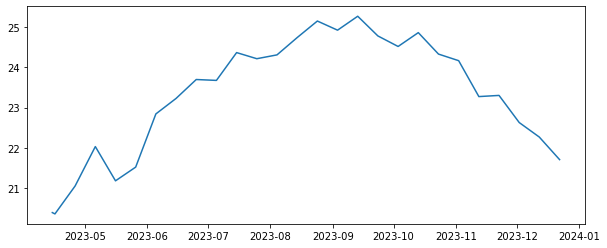

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(fechas_gregorianas, temp_sup)
plt.xlabel('Date')
plt.ylabel('Temperature (ºC)')
plt.minorticks_on()

In [12]:
# Calculamos la distancia media entre estaciones
dist = []
for j in range(len(temp_sup)):
    if j != len(temp_sup) - 1:
        
        dist.append(np.sqrt((Lon[j+1]-Lon[j])**2 + (Lat[j+1]-Lat[j])**2)*111.11)
dist = np.array(dist)
print('The mean distance between stations is: %.i +- %.i (km)'%(np.mean(dist), np.std(dist)))

The mean distance between stations is: 27 +- 13 (km)


In [13]:
mean_lat = np.mean(np.array(Lat))
mean_lon = np.mean(np.array(Lon))

# Combinamos datos temporales:

Debido a que nuestros datos de Copernicus van desde 1993 hasta 2021 y desde 2021 hasta 2023. Vamos a juntar ambos archivos para la misma ubicación

In [14]:
import xarray as xr

# Rutas de los archivos
file_path1 = 'Datos/cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_1703597044865.nc'
file_path2 = 'Datos/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m_1703674071184.nc'

# Leer los archivos NetCDF
data1 = xr.open_dataset(file_path1)
data2 = xr.open_dataset(file_path2)

# Verificando la estructura básica de los datos
data1_info = data1.info()
data2_info = data2.info()

data1_info, data2_info


xarray.Dataset {
dimensions:
	depth = 1 ;
	latitude = 97 ;
	time = 1147 ;
	longitude = 121 ;

variables:
	float32 depth(depth) ;
		depth:valid_min = 0.49402499198913574 ;
		depth:valid_max = 0.49402499198913574 ;
		depth:units = m ;
		depth:positive = down ;
		depth:unit_long = Meters ;
		depth:long_name = Depth ;
		depth:standard_name = depth ;
		depth:axis = Z ;
		depth:_ChunkSizes = 50 ;
		depth:_CoordinateAxisType = Height ;
		depth:_CoordinateZisPositive = down ;
	float32 latitude(latitude) ;
		latitude:valid_min = 26.0 ;
		latitude:valid_max = 34.0 ;
		latitude:step = 0.08333587646484375 ;
		latitude:units = degrees_north ;
		latitude:unit_long = Degrees North ;
		latitude:long_name = Latitude ;
		latitude:standard_name = latitude ;
		latitude:axis = Y ;
		latitude:_ChunkSizes = 2041 ;
		latitude:_CoordinateAxisType = Lat ;
	float32 thetao(time, depth, latitude, longitude) ;
		thetao:long_name = Temperature ;
		thetao:standard_name = sea_water_potential_temperature ;
		thetao:uni

(None, None)

In [15]:
# Coordenadas especificadas para la extracción de datos
lat_target = mean_lat
lon_target = mean_lon

# Función para encontrar el índice más cercano para una coordenada dada
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Encontrando los índices más cercanos para latitud y longitud en ambos conjuntos de datos
lat_idx1 = find_nearest_index(data1['latitude'], lat_target)
lon_idx1 = find_nearest_index(data1['longitude'], lon_target)

lat_idx2 = find_nearest_index(data2['latitude'], lat_target)
lon_idx2 = find_nearest_index(data2['longitude'], lon_target)

# Extracción de la serie temporal de la temperatura en el punto específico del primer conjunto de datos
temp_series1 = data1['thetao'][:, 0, lat_idx1, lon_idx1].values

# Verificando el rango de fechas del primer conjunto de datos
time_range1 = data1['time'].values

temp_series1, time_range1[0], time_range1[-1]


(array([23.244625, 23.185976, 23.101925, ..., 22.582085, 22.491083,
        22.37862 ], dtype=float32),
 numpy.datetime64('2020-11-01T12:00:00.000000000'),
 numpy.datetime64('2023-12-22T12:00:00.000000000'))

In [16]:
# Extracción de la serie temporal de la temperatura en el punto específico del segundo conjunto de datos
temp_series2 = data2['thetao'][:, 0, lat_idx2, lon_idx2].values

# Verificando el rango de fechas del segundo conjunto de datos
time_range2 = data2['time'].values

temp_series2, time_range2[0], time_range2[-1]


(array([19.593   , 19.528   , 19.459   , ..., 20.654   , 20.569   ,
        20.498001], dtype=float32),
 numpy.datetime64('1993-01-01T12:00:00.000000000'),
 numpy.datetime64('2021-12-28T12:00:00.000000000'))

In [17]:

# Convertir las series de tiempo a pandas Series
time_series1 = pd.Series(temp_series1, index=pd.to_datetime(time_range1))
time_series2 = pd.Series(temp_series2, index=pd.to_datetime(time_range2))

# Combinando las dos series, manejando el solapamiento al quedarse con los datos del primer conjunto en el período solapado
combined_temp_series = pd.concat([time_series2[:'2020-10-31'], time_series1])

combined_temp_series.head(), combined_temp_series.tail(), combined_temp_series.shape


(1993-01-01 12:00:00    19.593
 1993-01-02 12:00:00    19.528
 1993-01-03 12:00:00    19.459
 1993-01-04 12:00:00    19.402
 1993-01-05 12:00:00    19.350
 dtype: float32,
 2023-12-18 12:00:00    22.630800
 2023-12-19 12:00:00    22.628666
 2023-12-20 12:00:00    22.582085
 2023-12-21 12:00:00    22.491083
 2023-12-22 12:00:00    22.378620
 dtype: float32,
 (11313,))

In [18]:
temperatures_array = combined_temp_series.values
dates_list = combined_temp_series.index.to_list()

In [19]:
# Guardamos también los datos en arrays
T_model = temperatures_array
t = dates_list

In [20]:
# Función para verificar si una fecha es un día bisiesto
def es_bisiesto(fecha):
    anio = fecha.year
    return anio % 4 == 0 and (anio % 100 != 0 or anio % 400 == 0)

# Filtrar las fechas y temperaturas, excluyendo los días bisiestos
t_filtrado = []
T_model_filtrado = []

for fecha, temp in zip(t, T_model):
    if not (es_bisiesto(fecha) and fecha.month == 2 and fecha.day == 29):
        t_filtrado.append(fecha)
        T_model_filtrado.append(temp)

In [21]:
print('Hemos eliminado %i días bisiestos'%(len(t)-len(t_filtrado)))
T_model = np.array(T_model_filtrado)
t = t_filtrado

Hemos eliminado 7 días bisiestos


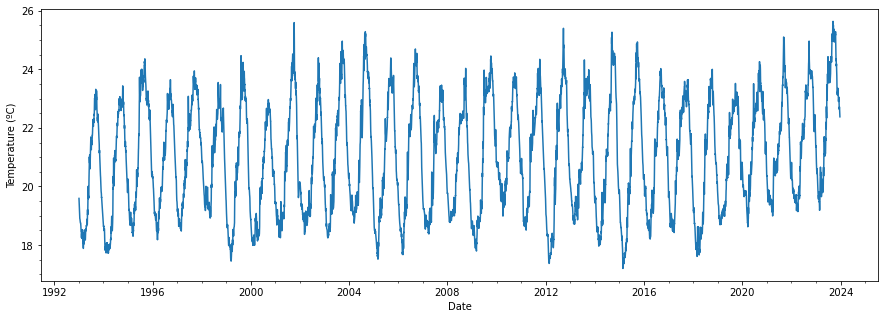

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(t, T_model)
plt.xlabel('Date')
plt.ylabel('Temperature (ºC)')
plt.minorticks_on()

## Gráficos de los datos de Copernicus

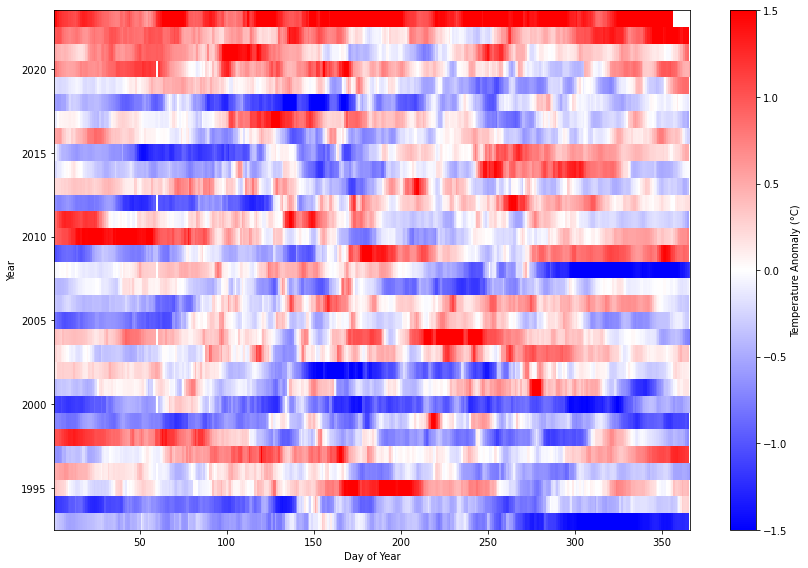

In [23]:

# Convertimos el array en una serie de pandas
temperature_series = pd.Series(T_model, index=t)

# Calculamos el Diagrama de Hovmoller para la anomalía de la SST
# Calculamos la anomalía diaria

# Calculamos la climatología diaria (media por día)
daily_climatology = temperature_series.groupby([temperature_series.index.month, temperature_series.index.day]).mean()

# Alineamos los índices con la serie de temperatura 
# Asignaremos cada fecha de la serie de temperaturas a su correspondiente (mes, día) en la climatología
climatology_index = [(date.month, date.day) for date in temperature_series.index]
aligned_climatology = daily_climatology[climatology_index].values

# Calculamos las anomalías restando la climatología diaria alineada de las temperaturas reales
anomalies = temperature_series - aligned_climatology


anomalies_hovmoller = anomalies.groupby([anomalies.index.year, anomalies.index.dayofyear]).mean().unstack(level=0)

import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_colormap', 
    [(0, 'blue'), (0.5, 'white'), (1, 'red')]
)


plt.figure(figsize=(12, 8))
plt.pcolormesh(anomalies_hovmoller.index, anomalies_hovmoller.columns, anomalies_hovmoller.T, shading='nearest', cmap=cmap)
plt.colorbar(label='Temperature Anomaly (°C)')
plt.clim(-1.5, 1.5)
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


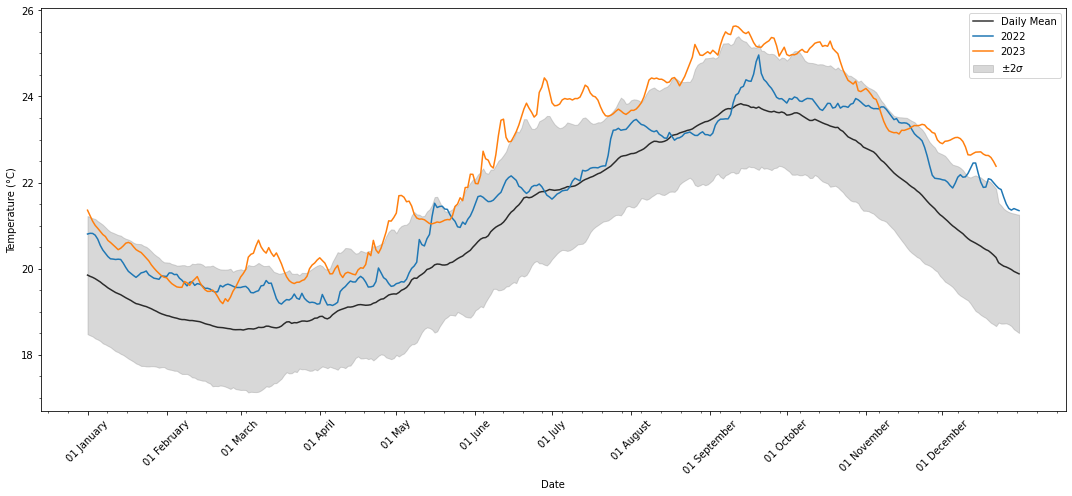

In [24]:
# Primero, creamos el DataFrame de pandas con la serie temporal completa y las fechas.
import matplotlib.dates as mdates

df_temperatures = pd.DataFrame({
    'Temperature': T_model,
    'Date': pd.to_datetime(t)
})

# Establecemos la fecha como índice.
df_temperatures.set_index('Date', inplace=True)

# Calculamos la media histórica y la desviación estándar para cada día del año.
historical_mean = df_temperatures.groupby([df_temperatures.index.month, df_temperatures.index.day]).mean().squeeze()
historical_std = df_temperatures.groupby([df_temperatures.index.month, df_temperatures.index.day]).std().squeeze()

# Calcular las bandas de dos desviaciones estándar.
std_plus = historical_mean + 2 * historical_std
std_minus = historical_mean - 2 * historical_std

# Ahora, separamos las series de los dos últimos años para el gráfico.
last_two_years = df_temperatures[df_temperatures.index.year > df_temperatures.index.year.max() - 2]

# Preparamos el gráfico.
plt.figure(figsize=(15, 7))

# Dibujamos la media histórica.
dates_for_plotting = pd.to_datetime(['2000-' + str(month).zfill(2) + '-' + str(day).zfill(2) for month, day in historical_mean.index])
plt.plot(dates_for_plotting, historical_mean.values, color='black', alpha=0.8, label='Daily Mean')

# Convertimos el MultiIndex en un índice de fechas para el eje x, usando el mismo método que antes
dates_for_plotting = pd.to_datetime(['2000-' + str(month).zfill(2) + '-' + str(day).zfill(2) for month, day in std_plus.index])
# Dibujamos las bandas de dos desviaciones estándar.
plt.fill_between(dates_for_plotting, std_minus.values, std_plus.values, color='grey', alpha=0.3, label=r'$\pm 2 \sigma$')

# Dibujamos las series de los dos últimos años con diferentes colores.
# Dibujamos las series de los dos últimos años con diferentes colores.
for year in last_two_years.index.year.unique():
    # Seleccionamos los datos del año correspondiente
    yearly_data = last_two_years[last_two_years.index.year == year]
    
    # Creamos un rango de fechas para ese año omitiendo el 29 de febrero
    # Utilizamos el año 2000 como base ya que es un año no bisiesto
    fake_year = '2000'
    fake_dates = pd.date_range(start=f'{fake_year}-01-01', end=f'{fake_year}-12-31', freq='D').to_pydatetime().tolist()
    fake_dates = [d for d in fake_dates if not (d.month == 2 and d.day == 29)]
    fake_index = pd.to_datetime([datetime.strptime(f"{fake_year}-{date.month}-{date.day}", "%Y-%m-%d") for date in yearly_data.index])

    # Dibujamos la serie de temperatura para ese año
    plt.plot(
        fake_index,
        yearly_data['Temperature'],
        label=f'{year}'
    )
    
# Mejoramos el gráfico con títulos y leyendas.

first_of_month = [pd.Timestamp(year=2000, month=m, day=1) for m in range(1, 13)]
# Etiquetas en inglés para el primero de cada mes
tick_labels = ['1 January', '1 February', '1 March', '1 April', '1 May', '1 June', 
               '1 July', '1 August', '1 September', '1 October', '1 November', '1 December']

# Aplicar las marcas y etiquetas personalizadas al gráfico
plt.xticks(first_of_month, tick_labels, rotation=45)  # Rotar para una mejor legibilidad

# Configurar formato de fecha para el eje X para que matplotlib los reconozca correctamente
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %B'))

plt.xlabel('Date')
plt.tight_layout()  # Ajustar el layout para que las etiquetas rotadas encajen

plt.ylabel('Temperature (°C)')
plt.legend()
plt.minorticks_on()
plt.tight_layout()
plt.show()

# Reducción de los datos de Copernicus mediante Promedios

Para entrenar las series temporales debemos reducir el número de datos. Para ello vamos a reducir el número de datos de forma diaria a semanal. Es decir, tendremos aproximadamente 52 datos anuales.

In [25]:
# Crear un DataFrame a partir de T_model
dates = pd.date_range(start=t[0], periods=len(T_model), freq='D')
df = pd.DataFrame({'Date': t, 'Temperature': T_model})
df.set_index('Date', inplace=True)

# Agrupar por semana y calcular el promedio
weekly_avg = df.resample('W').mean()

weekly_avg.head(), weekly_avg.tail(), weekly_avg.shape

(            Temperature
 Date                   
 1993-01-03    19.526667
 1993-01-10    19.183857
 1993-01-17    18.892286
 1993-01-24    18.776428
 1993-01-31    18.658142,
             Temperature
 Date                   
 2023-11-26    23.308289
 2023-12-03    23.007763
 2023-12-10    22.985773
 2023-12-17    22.678320
 2023-12-24    22.542252,
 (1617, 1))

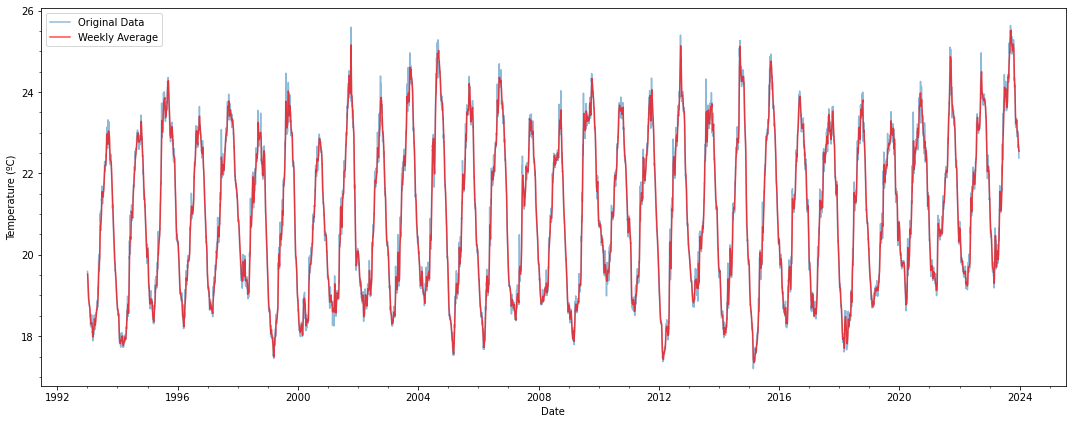

In [26]:
plt.figure(figsize=(15, 6))

# Plot de los datos originales
plt.plot(df.index, df['Temperature'], label='Original Data', alpha=0.5)

# Plot de los promedios semanales
plt.plot(weekly_avg.index, weekly_avg['Temperature'], label='Weekly Average', color='red', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Temperature (ºC)')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

Calculamos la raíz del error cuadrático medio de los datos interpolados del promedio semanal de las series, con respecto a los datos originales. 

In [27]:
from sklearn.metrics import mean_squared_error

# Interpolar los promedios semanales para coincidir con los días en los datos originales
weekly_avg_interpolated = weekly_avg.resample('D').interpolate()

# Rellenar los posibles valores NaN después de la interpolación
weekly_avg_interpolated = weekly_avg_interpolated.fillna(method='ffill')

# Eliminar días bisiestos de weekly_avg_interpolated
weekly_avg_interpolated_no_leap = weekly_avg_interpolated[~((weekly_avg_interpolated.index.is_leap_year) & (weekly_avg_interpolated.index.month == 2) & (weekly_avg_interpolated.index.day == 29))]


# Calcular el RMSE
rmse = mean_squared_error(df['Temperature'], weekly_avg_interpolated_no_leap['Temperature'], squared=True)
print('La raíz del error cuadrático medio de esta aproximación es: %.4f ºC '%rmse)


# Normalizar el índice para eliminar la hora
df.index = df.index.normalize()

# Seleccionar los datos en df que coinciden con las fechas en datos_argo
df_filtrado = df[df.index.isin(datos_argo.index)]

# Calcular el RMSE
# Asegúrate de que df_filtrado y datos_argo estén en el mismo orden y tengan la misma longitud
rmse = mean_squared_error(df_filtrado.values, datos_argo.values, squared=True)
print("Raíz del Error Cuadrático Medio (RMSE) entre datos de Copernicus y Argo: {:.4f} ºC".format(rmse))

La raíz del error cuadrático medio de esta aproximación es: 0.0167 ºC 
Raíz del Error Cuadrático Medio (RMSE) entre datos de Copernicus y Argo: 0.1301 ºC


# Análisis de las series temporales 

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

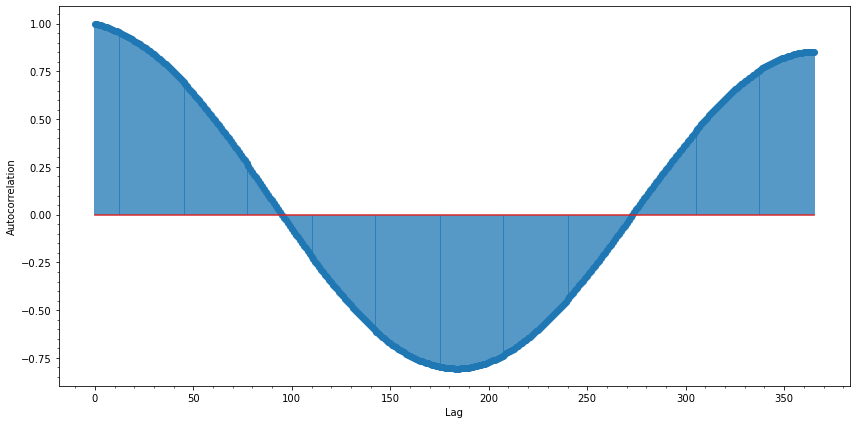

In [29]:
# Cálculo de la función de autocorrelación de las series de temperatura en superficie
from statsmodels.tsa.stattools import acf
autocorrelation = acf(T_model, nlags=365, fft=False)
lags = np.arange(len(autocorrelation))

plt.figure(figsize=(12, 6))
plt.stem(lags, autocorrelation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.minorticks_on()

plt.tight_layout()
plt.show()


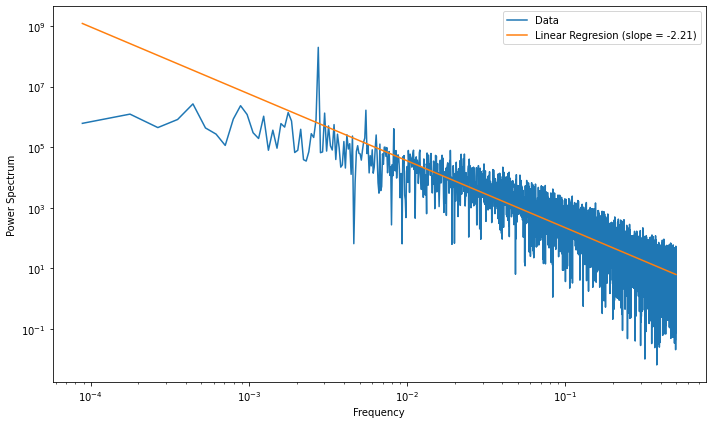

In [30]:
from scipy import stats

frecuencias = np.fft.rfftfreq(len(T_model), d=1)  # d es el intervalo de tiempo entre mediciones

fourier_transform = np.fft.rfft(T_model)
abs_fourier_transform = np.abs(fourier_transform)
power_spectrum = np.square(abs_fourier_transform)

# Tomando el logaritmo de las frecuencias y del espectro de potencias
log_frecuencias = np.log(frecuencias[1:])  # Evitamos el logaritmo de cero
log_power_spectrum = np.log(power_spectrum[1:])

# Ajustar una línea recta a los datos en la escala log-log
slope, intercept, r_value, p_value, std_err = stats.linregress(log_frecuencias, log_power_spectrum)

# Crear un gráfico log-log del espectro de potencias con la línea de ajuste
plt.figure(figsize=(10, 6))
plt.loglog(frecuencias[1:], power_spectrum[1:], label='Data')
plt.loglog(frecuencias[1:], np.exp(intercept + slope * log_frecuencias), label=f'Linear Regresion (slope = {slope:.2f})')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.legend()
plt.minorticks_on()
plt.tight_layout()
plt.show()

Por tanto la serie se puede considerar Browniana

In [31]:
stationarityTest = adfuller(weekly_avg, autolag='AIC')

print("P-value: ", stationarityTest[1])


P-value:  1.8576625810603232e-25


Por tanto la serie puede considerarse constante.

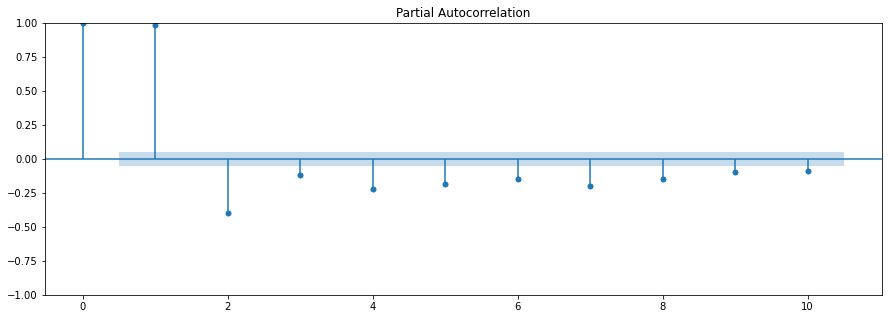

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(weekly_avg, ax = ax, lags=10)
plt.xticks()
plt.show()

In [33]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

punto_corte = int(len(weekly_avg) * 0.9)
datos_entrenamiento = weekly_avg[:punto_corte]
datos_prueba = weekly_avg[punto_corte:]

# Ajustar el modelo SARIMA al conjunto de entrenamiento
# Los siguientes son parámetros de ejemplo; se deben ajustar según tu análisis
modelo_sarima = SARIMAX(datos_entrenamiento, 
                        order=(1, 1, 2), 
                        seasonal_order=(1, 1, 1, 52))

resultado = modelo_sarima.fit()

# Realizar predicciones para el conjunto de prueba
predicciones = resultado.get_forecast(steps=len(datos_prueba))
predicciones_media = predicciones.predicted_mean
intervalo_confianza = predicciones.conf_int()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77939D-01    |proj g|=  9.14739D-01

At iterate    5    f=  2.24958D-01    |proj g|=  3.10119D-01

At iterate   10    f=  1.99837D-01    |proj g|=  1.49904D-01

At iterate   15    f=  1.95909D-01    |proj g|=  7.48557D-03

At iterate   20    f=  1.95824D-01    |proj g|=  2.66517D-02

At iterate   25    f=  1.95370D-01    |proj g|=  2.32484D-03

At iterate   30    f=  1.95367D-01    |proj g|=  4.18500D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [34]:
# Reindexar y interpolar datos_prueba y predicciones_media para coincidir con datos_reales


datos_prueba_interpolados = datos_prueba.reindex(datos_argo.index).interpolate(method='linear')
predicciones_media_interpoladas = predicciones_media.reindex(datos_argo.index).interpolate(method='linear')

# Rellenar los valores NaN resultantes con la media
datos_prueba_interpolados.fillna(datos_prueba_interpolados.mean(), inplace=True)
predicciones_media_interpoladas.fillna(predicciones_media_interpoladas.mean(), inplace=True)


# Calcular RMSE entre predicciones_media interpoladas y datos_reales
rmse_predicciones_real = mean_squared_error(predicciones_media_interpoladas, datos_argo, squared=True)

print('RMSE entre predicciones interpoladas y datos reales (Argo): {:.4f} ºC'.format(rmse_predicciones_real))


RMSE entre predicciones interpoladas y datos reales (Argo): 1.1024 ºC


Error Cuadrático Medio entre datos de prueba (Copernicus) y su predicción: 0.5657 ºC


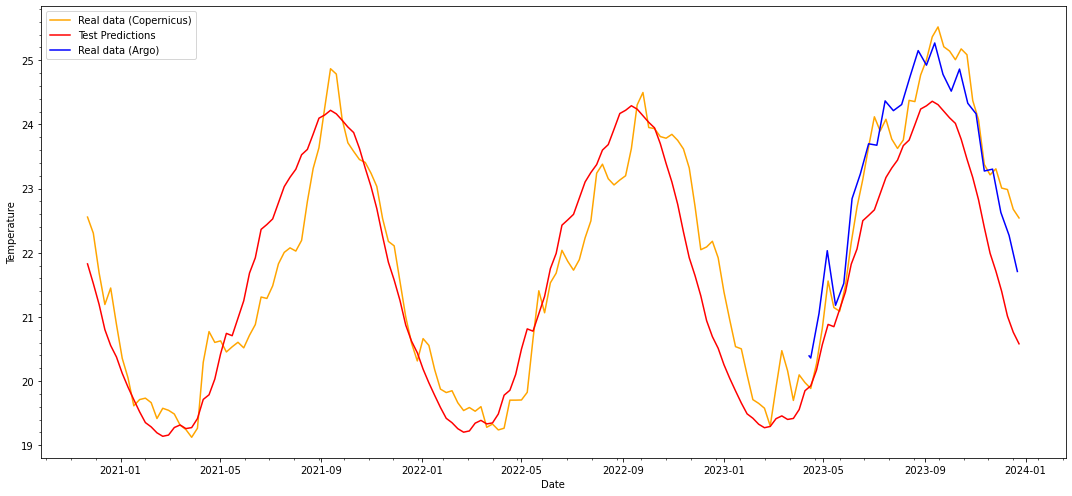

In [35]:
# Graficar los resultados usando el método .plot() de Pandas
plt.figure(figsize=(15, 7))
mse = mean_squared_error(datos_prueba, predicciones_media, squared=True)
print('Error Cuadrático Medio entre datos de prueba (Copernicus) y su predicción: {:.4f} ºC'.format(mse))


plt.plot(datos_prueba.index, datos_prueba.values, label='Real data (Copernicus)', color='orange')
plt.plot(predicciones_media.index, predicciones_media.values, label='Test Predictions', color='red')
plt.plot(datos_argo.index, datos_argo.values, label='Real data (Argo)', color='blue')

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.minorticks_on()
plt.tight_layout()
plt.savefig('Graficas/SARIMAX_series.pdf', dpi=1400)  
plt.show()

# Modelo de Redes Neuronales Recurrentes

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Extraer la columna 'Temperature' para el entrenamiento
data = df['Temperature'].values
data = data.reshape(-1, 1)  # Cambiar la forma para el escalado

# Preprocesamiento
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Crear datos de entrenamiento supervisados

def create_dataset(dataset, look_back=1, forecast_horizon=5):
    X, Y = [], []
    for i in range(len(dataset) - look_back - forecast_horizon):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back + forecast_horizon - 1, 0])
    return np.array(X), np.array(Y)

# Suponiendo que aún quieres usar un look_back de 1
look_back = 7
forecast_horizon = 14  # Predecir 14 días en el futuro
X, Y = create_dataset(scaled_data, look_back, forecast_horizon)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Cambiar la forma de entrada para que sea [muestras, pasos de tiempo, características]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crear y entrenar la red LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_test, Y_test))

# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir predicciones
train_predict = scaler.inverse_transform(train_predict)
Y_train = Y_train.reshape(-1, 1)  # Cambiar la forma para el escalado inverso
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = Y_test.reshape(-1, 1)  # Cambiar la forma para el escalado inverso
Y_test = scaler.inverse_transform(Y_test)


2024-01-09 09:14:58.985521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
10156/10156 - 15s - loss: 0.0067 - val_loss: 0.0060 - 15s/epoch - 1ms/step
Epoch 2/100
10156/10156 - 14s - loss: 0.0059 - val_loss: 0.0055 - 14s/epoch - 1ms/step
Epoch 3/100
10156/10156 - 15s - loss: 0.0056 - val_loss: 0.0053 - 15s/epoch - 2ms/step
Epoch 4/100
10156/10156 - 13s - loss: 0.0054 - val_loss: 0.0053 - 13s/epoch - 1ms/step
Epoch 5/100
10156/10156 - 13s - loss: 0.0053 - val_loss: 0.0053 - 13s/epoch - 1ms/step
Epoch 6/100
10156/10156 - 13s - loss: 0.0053 - val_loss: 0.0053 - 13s/epoch - 1ms/step
Epoch 7/100
10156/10156 - 13s - loss: 0.0053 - val_loss: 0.0055 - 13s/epoch - 1ms/step
Epoch 8/100
10156/10156 - 13s - loss: 0.0052 - val_loss: 0.0056 - 13s/epoch - 1ms/step
Epoch 9/100
10156/10156 - 14s - loss: 0.0052 - val_loss: 0.0053 - 14s/epoch - 1ms/step
Epoch 10/100
10156/10156 - 14s - loss: 0.0052 - val_loss: 0.0051 - 14s/epoch - 1ms/step
Epoch 11/100
10156/10156 - 13s - loss: 0.0052 - val_loss: 0.0057 - 13s/epoch - 1ms/step
Epoch 12/100
10156/10156 - 14s - loss: 0.

Epoch 95/100
10156/10156 - 13s - loss: 0.0050 - val_loss: 0.0052 - 13s/epoch - 1ms/step
Epoch 96/100
10156/10156 - 13s - loss: 0.0050 - val_loss: 0.0052 - 13s/epoch - 1ms/step
Epoch 97/100
10156/10156 - 13s - loss: 0.0050 - val_loss: 0.0053 - 13s/epoch - 1ms/step
Epoch 98/100
10156/10156 - 14s - loss: 0.0050 - val_loss: 0.0051 - 14s/epoch - 1ms/step
Epoch 99/100
10156/10156 - 14s - loss: 0.0050 - val_loss: 0.0052 - 14s/epoch - 1ms/step
Epoch 100/100
10156/10156 - 13s - loss: 0.0050 - val_loss: 0.0053 - 13s/epoch - 1ms/step
36/36 [==============================] - 0s 924us/step


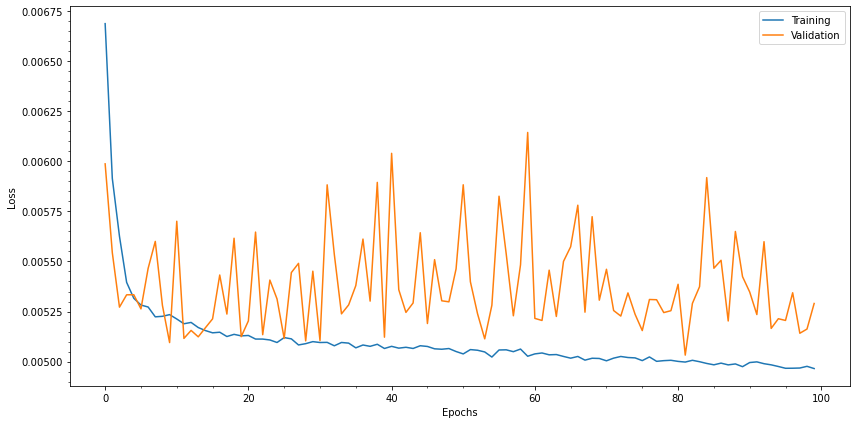

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

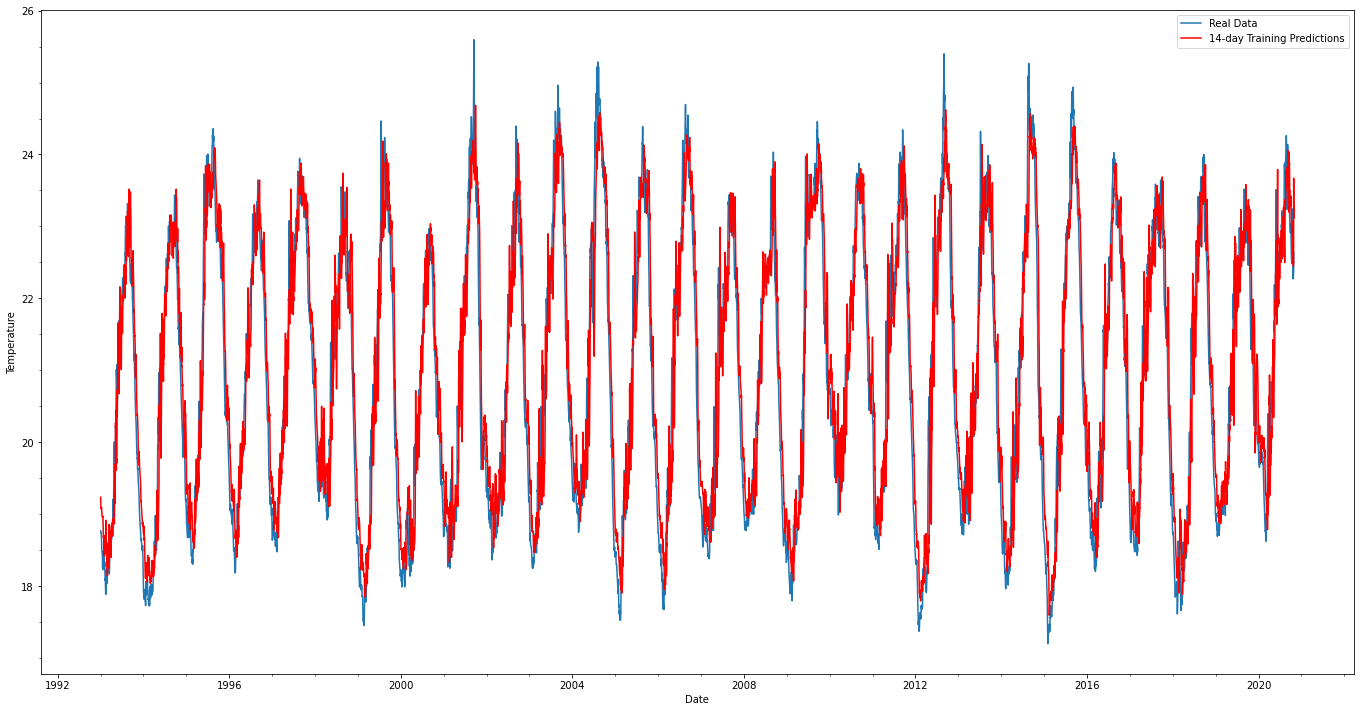

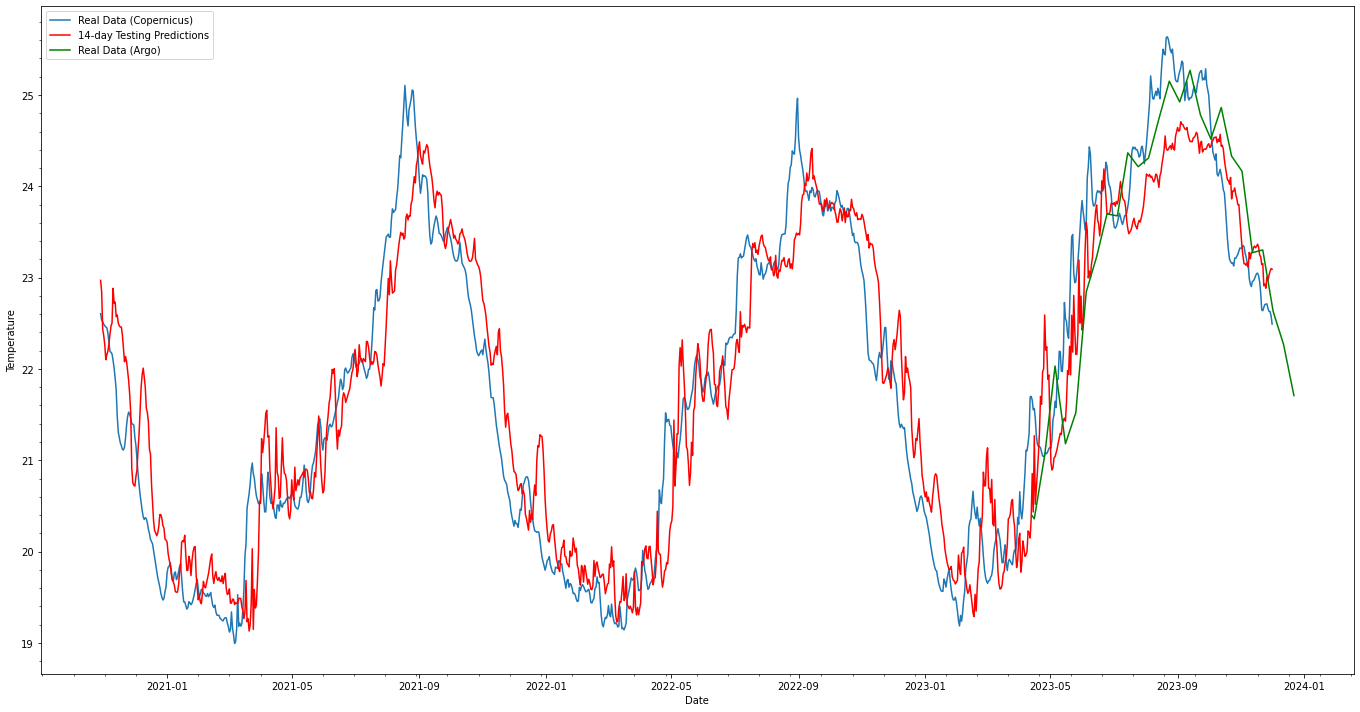

In [38]:
# Calcular los índices de tiempo para los conjuntos de entrenamiento y prueba
time_train = df.index[:len(train_predict)]
time_test = df.index[len(train_predict):(len(train_predict) + len(test_predict))]

# Gráfico para el conjunto de entrenamiento
plt.figure(figsize=(19, 10))
plt.plot(time_train, Y_train, label='Real Data')
plt.plot(time_train, train_predict, label=f'{forecast_horizon}-day Training Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico para el conjunto de prueba
plt.figure(figsize=(19, 10))
plt.plot(time_test, Y_test, label='Real Data (Copernicus)')
plt.plot(time_test, test_predict, label=f'{forecast_horizon}-day Testing Predictions', color='red')
plt.plot(datos_argo.index, datos_argo.values, label='Real Data (Argo)', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc = 'upper left')
plt.minorticks_on()
plt.tight_layout()
plt.show()


In [39]:
from scipy.interpolate import interp1d

# Interpolación
# Crear una función de interpolación basada en tus predicciones
interp_func = interp1d(pd.to_datetime(time_test), test_predict.flatten(), kind='linear', fill_value="extrapolate")


# Convertir las fechas de 'time_test' a timestamps
time_test_numeric = pd.to_datetime(time_test).astype(int)

# Crear la función de interpolación utilizando los timestamps
interp_func = interp1d(time_test_numeric, test_predict.flatten(), kind='linear', fill_value="extrapolate")

# Convertir las fechas en 'datos_argo.index' a timestamps para la interpolación
argo_dates_numeric = pd.to_datetime(datos_argo.index).astype(int)

# Usar la función de interpolación
predicted_at_argo_dates = interp_func(argo_dates_numeric)


# Asegúrate de que ambos conjuntos de datos estén en la misma longitud
min_length = min(len(predicted_at_argo_dates), len(datos_argo))
predicted_at_argo_dates = predicted_at_argo_dates[:min_length]
real_argo_data = datos_argo.values[:min_length]


# Calcular el RMSE
# Asegúrate de que df_filtrado y datos_argo estén en el mismo orden y tengan la misma longitud
rmse = mean_squared_error(df_filtrado.values, datos_argo.values, squared=True)


# Calcular RMSE
rmse_nn = mean_squared_error(real_argo_data, predicted_at_argo_dates, squared=True)
print('RMSE entre predicciones interpoladas y datos reales: {:.4f} (ºC)'.format(rmse_nn))

Y_test_reshaped = Y_test.reshape(-1, 1)  

# Calcular RMSE para los datos de testing
rmse_test = mean_squared_error(Y_test_reshaped, test_predict, squared=True)
print('RMSE entre predicciones y los datos de testing: {:.4f} (ºC)'.format(rmse_test))

RMSE entre predicciones interpoladas y datos reales: 0.4544 (ºC)
RMSE entre predicciones y los datos de testing: 0.3765 (ºC)
